In [1]:
## Reload the modules each time there are modified
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('mathtext', fontset="cm")

from IPython.display import HTML
from src.utils import print_loading

import src as mpmab

### Define bandit environment

In [3]:
bandit = mpmab.BernoulliMAB([p / 10 for p in range(1, 10)])
K = bandit.nb_arms

### Regret decomposition of `Selfish`

In [4]:
M = 6 # number of players
strategy = mpmab.strategy(mpmab.PlayerSelfish, K, M, policy=mpmab.UCB1Policy(0.5))

time_horizon, N_runs = 4000, 100
exp = mpmab.MultiplayerExp(bandit, strategy, time_horizon)
cum_regret, cum_regret_terms = mpmab.multiple_runs(exp, N_runs, return_regret_decomposition=True)

100/100 [====================] (100%)

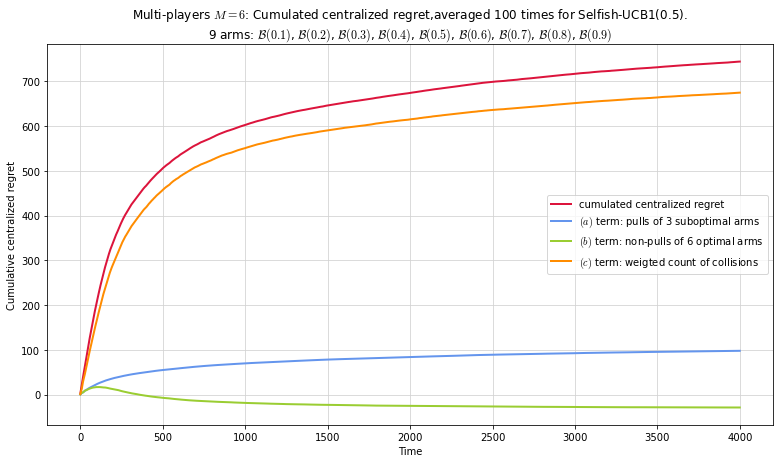

In [5]:
mpmab.display.plot_regret_decomposition(exp, cum_regret, cum_regret_terms, N_runs)
# plt.gcf().savefig("img/selfish_ucb_regret_decomp_1")

### Comparison of the strategies

In [6]:
M = 3

klucb_policy = mpmab.KlUCBPolicy([mpmab.Bernoulli for _ in range(K)])
mctop_klucb = mpmab.strategy(mpmab.PlayerMCTop, K, M, policy=klucb_policy)
randtop_klucb = mpmab.strategy(mpmab.PlayerRandTop, K, M, policy=klucb_policy)
selfish_klucb = mpmab.strategy(mpmab.PlayerSelfish, K, M, policy=klucb_policy)

ucb_policy = mpmab.UCB1Policy(0.5)
mctop_ucb1 = mpmab.strategy(mpmab.PlayerMCTop, K, M, policy=ucb_policy)
randtop_ucb1 = mpmab.strategy(mpmab.PlayerMCTop, K, M, policy=ucb_policy)
selfish_ucb1 = mpmab.strategy(mpmab.PlayerSelfish, K, M, policy=ucb_policy)

# strategies = {"RandTopM-klUCB": randtop_klucb, "RandTopM-UCB1": randtop_ucb1, "MCTopM-klUCB": mctop_klucb, "MCTopM-UCB1": mctop_ucb1}
strategies = {"RandTopM-UCB1": randtop_ucb1, "MCTopM-UCB1": mctop_ucb1, "Selfish-UCB1": selfish_ucb1}

In [7]:
time_horizon, N_runs = 5000, 100
cum_regrets = {strategy: np.zeros for strategy in strategies}
for name, players in strategies.items():
    print(name)
    cum_regret = mpmab.multiple_runs(mpmab.MultiplayerExp(bandit, players, time_horizon), N_runs)
    cum_regrets[name] = cum_regret
    print()

RandTopM-UCB1
100/100 [====================] (100%)
MCTopM-UCB1
100/100 [====================] (100%)
Selfish-UCB1
100/100 [====================] (100%)


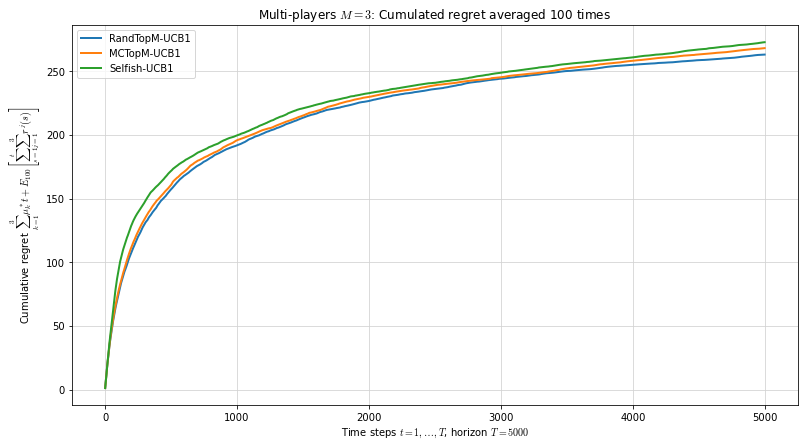

In [13]:
fig = plt.figure(figsize=(13, 7))

for name, cum_regret in cum_regrets.items():
    plt.plot(cum_regret, label=name, lw=2)

plt.xlabel(fr"Time steps $t=1, \dots, T$, horizon $T={time_horizon}$")
plt.ylabel(fr"Cumulative regret $\sum_{{k=1}}^{{{M}}} \mu_k^* t + E_{{{N_runs}}}\left[\sum_{{s=1}}^t\sum_{{j=1}}^{M}r^j(s)\right]$")
plt.title(fr"Multi-players $M={M}$: Cumulated regret averaged {N_runs} times")
plt.grid(color="lightgrey")
plt.legend()
plt.show()

fig.savefig("img/strategies_comparison")